# 학습 모델 보기 / 저장하기 / 불러오기

>   딥러닝 모델을 사용하려면 매번 계속 몇시간 동안 학습시켜야 되는지 궁금할 것입니다. <br />딥러닝 모델을 학습시킨다는 의미는 딥러닝 모델이 가지고 있는 뉴런들의 가중치를 조정하는 것을 의미합니다. <br /> 그러므로, 우리는 모델 구성과 가중치를 저장만 해놓으면, 필요할 때 언제든 저장한 모델의 구성과 가중치를 불러와서 사용할 수 있습니다.


In [1]:
# 라이브러리 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [2]:
# 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) =mnist.load_data()

print(f'Train 형태 : {x_train.shape}, {y_train.shape}')
print(f'Test 형태 : {x_test.shape}, {y_test.shape}')

Train 형태 : (60000, 28, 28), (60000,)
Test 형태 : (10000, 28, 28), (10000,)


In [3]:
# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

In [4]:
print(y_train[:5])

[5 0 4 1 9]


In [5]:
# 원-핫인 코딩 (Converts a class vector (integers) to binary class matrix.)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
# 훈련셋과 검증셋 분리
x_val = x_train[42000:] # 훈련셋의 30%를 검증셋으로
x_train = x_train[:42000]
y_val = y_train[42000:]
y_train = y_train[:42000]

In [7]:
print(f'Train 형태 : {x_train.shape}, {y_train.shape}')
print(f'val 형태 : {x_val.shape}, {y_val.shape}')

Train 형태 : (42000, 784), (42000, 10)
val 형태 : (18000, 784), (18000, 10)


In [8]:
# 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [9]:
# 모델 컴파일 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
# 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.8241 - accuracy: 0.7964 - val_loss: 0.4293 - val_accuracy: 0.8857
Epoch 2/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3928 - accuracy: 0.8924 - val_loss: 0.3463 - val_accuracy: 0.9024
Epoch 3/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3346 - accuracy: 0.9059 - val_loss: 0.3121 - val_accuracy: 0.9108
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3020 - accuracy: 0.9147 - val_loss: 0.2872 - val_accuracy: 0.9182
Epoch 5/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2783 - accuracy: 0.9206 - val_loss: 0.2687 - val_accuracy: 0.9236


In [11]:
# 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print("====================")
print("loss_and_metrics : " + str(loss_and_metrics))

313/313 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.9268
loss_and_metrics : [0.26126807928085327, 0.926800012588501]


In [12]:
# 모델 사용하기
from numpy import argmax
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat_pred = model.predict(xhat, verbose=0) 
yhat = yhat_pred.argmax(axis=-1)

for i in range(5):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 7, Predict : 7
True : 8, Predict : 8
True : 3, Predict : 3
True : 0, Predict : 0
True : 7, Predict : 7


## 학습된 모델 저장하기 ( model.save("***.h5") )

*   모델은 크게 모델 '아키텍처'와 모델 '가중치'로 구성됩니다.
*   아키텍처는 모델이 어떤 층으로 어떻게 쌓여있는 지에 대한 모델 구성이 정의되어 있습니다.
*   가중치는 처음에는 임의의 값으로 초기화되어 있지만, 훈련셋으로 학습하면서 갱신됩니다.

In [21]:
from keras.models import load_model
model.save('mnist_mlp_model.h5')

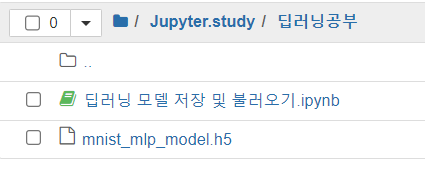
저장된 파일에 다음의 정보가 저장되어 있다.
*   나중에 모델을 재구성하기 위한 모델의 구성 정보
*   모델를 구성하는 각 뉴런들의 가중치
*   손실함수, 최적하기 등의 학습 설정
*   재학습을 할 수 있도록 마지막 학습 상태

## 모델 아키텍쳐 보기

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


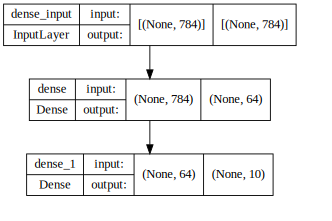

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

## 모델 불러오기 ( load_model("***.h5")
*   모델 불러오는 함수를 이용하여 앞서 저장한 모델 파일로부터 모델을 재형성한다.

In [14]:
# 2. 모델 불러오기
from keras.models import load_model
model2 = load_model('mnist_mlp_model.h5')

# 3. 모델 사용하기
yhat_pred = model2.predict(xhat, verbose=0) 
yhat = yhat_pred.argmax(axis=-1)

for i in range(5):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 7, Predict : 7
True : 8, Predict : 8
True : 3, Predict : 3
True : 0, Predict : 0
True : 7, Predict : 7


---

## 모델 가중치를 따로 저장가능한가?

>   가능합니다. 

In [17]:
# 가중치 저장하기
model.save_weights('mnist_mlp_weights.h5')

In [19]:
# 새 모델에 가중치 없이 돌리기.

# 모델 구성하기
new_model = Sequential()
new_model.add(Dense(units=64, input_dim=28*28, activation='relu'))
new_model.add(Dense(units=10, activation='softmax'))

new_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
new_model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 2.4632 - accuracy: 0.0573


[2.4632456302642822, 0.05730000138282776]

In [20]:
# 가중치 불러오기
new_model.load_weights("mnist_mlp_weights.h5")
new_model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.9268


[0.26126807928085327, 0.926800012588501]